   IMDB Score  Action  Action comedy  Action thriller  Action-adventure  \
0         2.5       0              0                0                 0   
1         2.6       0              0                0                 0   
2         2.6       0              0                0                 0   
3         3.2       0              0                0                 0   
4         3.4       0              0                0                 0   

   Action-thriller  Action/Comedy  Action/Science fiction  Adventure  \
0                0              0                       0          0   
1                0              0                       0          0   
2                0              0                       0          0   
3                0              0                       0          0   
4                0              0                       0          0   

   Adventure-romance  ...  Thriller  Urban fantasy  Variety Show  \
0                  0  ...         0             

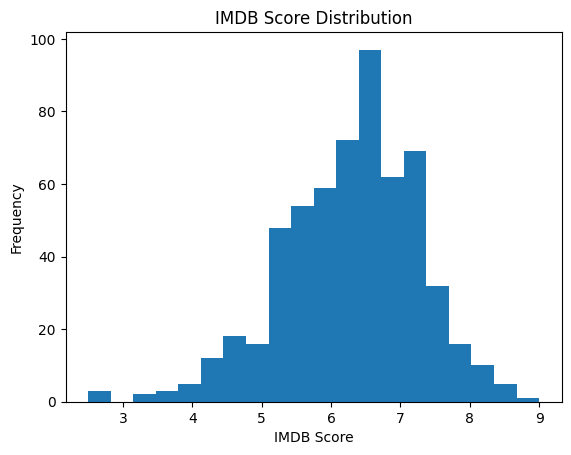

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


encodings_to_try = ['utf-8', 'ISO-8859-1', 'latin1', 'cp1252']
for encoding in encodings_to_try:
    try:
        data = pd.read_csv('NetflixOriginals.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        continue


data['IMDB Score'] = data['IMDB Score'].fillna(data['IMDB Score'].mean())


genres = data['Genre'].str.get_dummies(',')
data = pd.concat([data, genres], axis=1)


data['Premiere'] = pd.to_datetime(data['Premiere'])
data['PremiereYear'] = data['Premiere'].dt.year


data = data.drop(['Title', 'Genre', 'Premiere', 'Runtime', 'Language'], axis=1)


print(data.head())
print(data.describe())


plt.hist(data['IMDB Score'], bins=20)
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.title('IMDB Score Distribution')
plt.show()


